In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.metrics import confusion_matrix
import time
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import SpectralEmbedding
from sklearn import random_projection
from sklearn import random_projection
import time
from sklearn import metrics
from scipy.special import comb
from itertools import combinations
import matplotlib.pyplot as plt
import random
from itertools import permutations

# 0. helper function

In [ ]:
def plot_image(data,length):
    fig, ax = plt.subplots(3,3,subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
      im = axi.imshow(data[i].reshape(length,length), cmap='binary')
        # im.set_clim(0, 16)

def rand_score (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

def get_accuracy(y_test_3_t, y_test_3, y_test_gmm_1):
  comb = permutations([0, 1, 2], 3)
  acc_test_max = 0
  index = 0
  for i in comb:
      print(i)
      y_test_3_t[y_test_3 == 9] = i[0]
      y_test_3_t[y_test_3 == 8] = i[1]
      y_test_3_t[y_test_3 == 5] = i[2]
      acc_test = accuracy_score(y_test_gmm_1, y_test_3_t)
      if(acc_test_max < acc_test):
        acc_test_max = acc_test
        index = i
      print("Test accuracy : %f" % acc_test) # Test accuracy 
  return acc_test_max, index  

# 1. load dataset

In [ ]:
os.chdir("/content/drive/MyDrive/MATH 123/fashion-mnist/utils")
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/content/drive/MyDrive/MATH 123/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/content/drive/MyDrive/MATH 123/fashion-mnist/data/fashion', kind='t10k')
for i in [X_train,y_train,X_test,y_test]:
  print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
train_index = np.where((y_train==5)|(y_train==8)|(y_train==9))
xtrain = X_train[train_index]
ytrain = y_train[train_index]
test_index = np.where((y_test==5)|(y_test==8)|(y_test==9))
xtest = X_train[test_index]
ytest = y_train[test_index]
for i in [xtrain,ytrain,xtest,ytest]:
  print(i.shape)

(18000, 784)
(18000,)
(3000, 784)
(3000,)


In [ ]:
train_idx_5 = np.where((ytrain==5))
train_idx_8 = np.where((ytrain==8))
train_idx_9 = np.where((ytrain==9))
test_idx_5 = np.where((ytest==5))
test_idx_8 = np.where((ytest==8))
test_idx_9 = np.where((ytest==9))

# 2. Dimension reduction

## 2.1 pca

In [ ]:
from sklearn.decomposition import PCA
my_PCA = PCA(n_components=3)
xtrain_pca = my_PCA.fit_transform(xtrain)
xtest_pca = my_PCA.fit_transform(xtest)

In [ ]:
xtest_pca

array([[ -157.55425037,  1649.75200072,  1247.02017173],
       [-1618.01752549,  -370.7355548 ,  -144.62689005],
       [  755.48381148,   648.3884867 ,   779.02929278],
       ...,
       [ -776.7474444 ,  1329.71448165,   794.38244757],
       [ 1148.28060684,  -641.79989701,   799.59204226],
       [  944.82022681,   649.60308709,  -779.57155067]])

In [ ]:
x_pca = xtrain_pca[:,0]
y_pca = xtrain_pca[:,1]
z_pca = xtrain_pca[:,2]

In [ ]:
x_pca_5 = x_pca[train_idx_5]
x_pca_8 = x_pca[train_idx_8]
x_pca_9 = x_pca[train_idx_9]
y_pca_5 = y_pca[train_idx_5]
y_pca_8 = y_pca[train_idx_8]
y_pca_9 = y_pca[train_idx_9]
z_pca_5 = z_pca[train_idx_5]
z_pca_8 = z_pca[train_idx_8]
z_pca_9 = z_pca[train_idx_9]

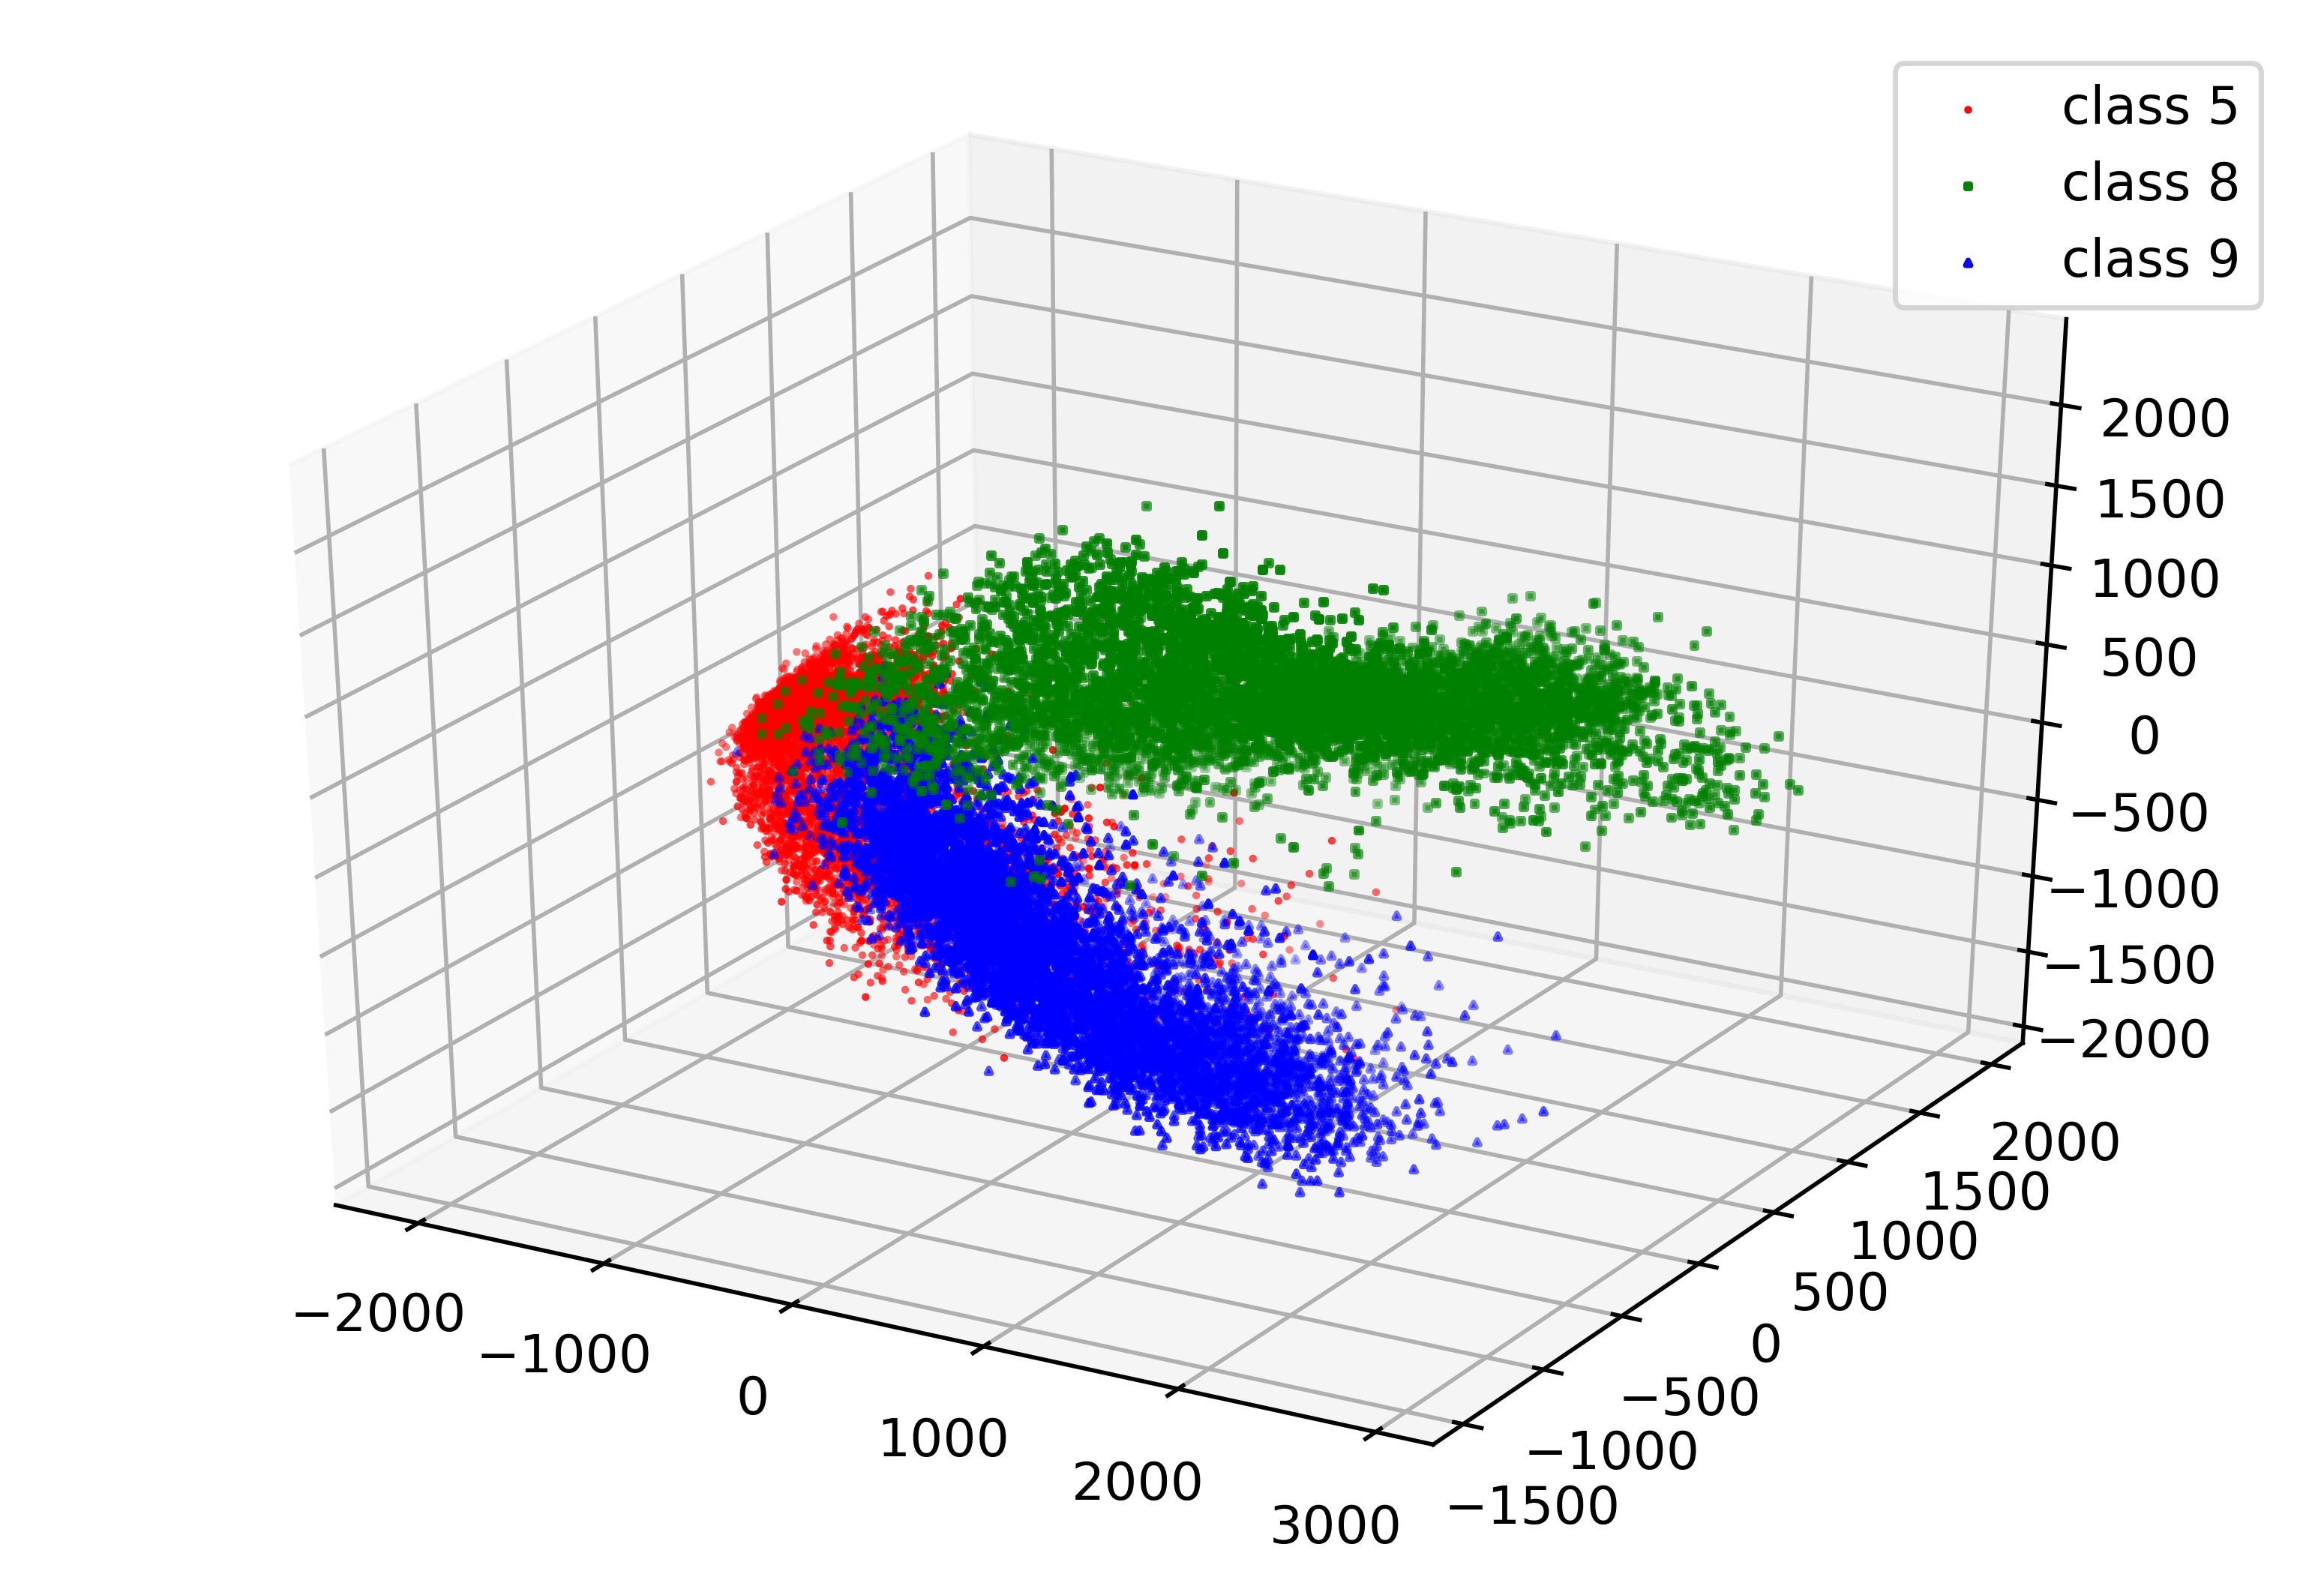

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_pca_5,y_pca_5,z_pca_5,c='r',label='class 5',marker='.',s=1)
ax.scatter(x_pca_8,y_pca_8,z_pca_8,c='g',label='class 8',marker='s',s=1)
ax.scatter(x_pca_9,y_pca_9,z_pca_9,c='b',label='class 9',marker='^',s=1)
ax.legend(loc='best')

# 2.2 random projection

In [ ]:
my_RP = random_projection.GaussianRandomProjection(n_components=3)
xtrain_RP = my_RP.fit_transform(xtrain)
xtest_RP = my_RP.fit_transform(xtest)

In [ ]:
x_RP = xtrain_RP[:,0]
y_RP = xtrain_RP[:,1]
z_RP = xtrain_RP[:,2]

In [ ]:
x_RP_5 = x_RP[train_idx_5]
x_RP_8 = x_RP[train_idx_8]
x_RP_9 = x_RP[train_idx_9]
y_RP_5 = y_RP[train_idx_5]
y_RP_8 = y_RP[train_idx_8]
y_RP_9 = y_RP[train_idx_9]
z_RP_5 = z_RP[train_idx_5]
z_RP_8 = z_RP[train_idx_8]
z_RP_9 = z_RP[train_idx_9]

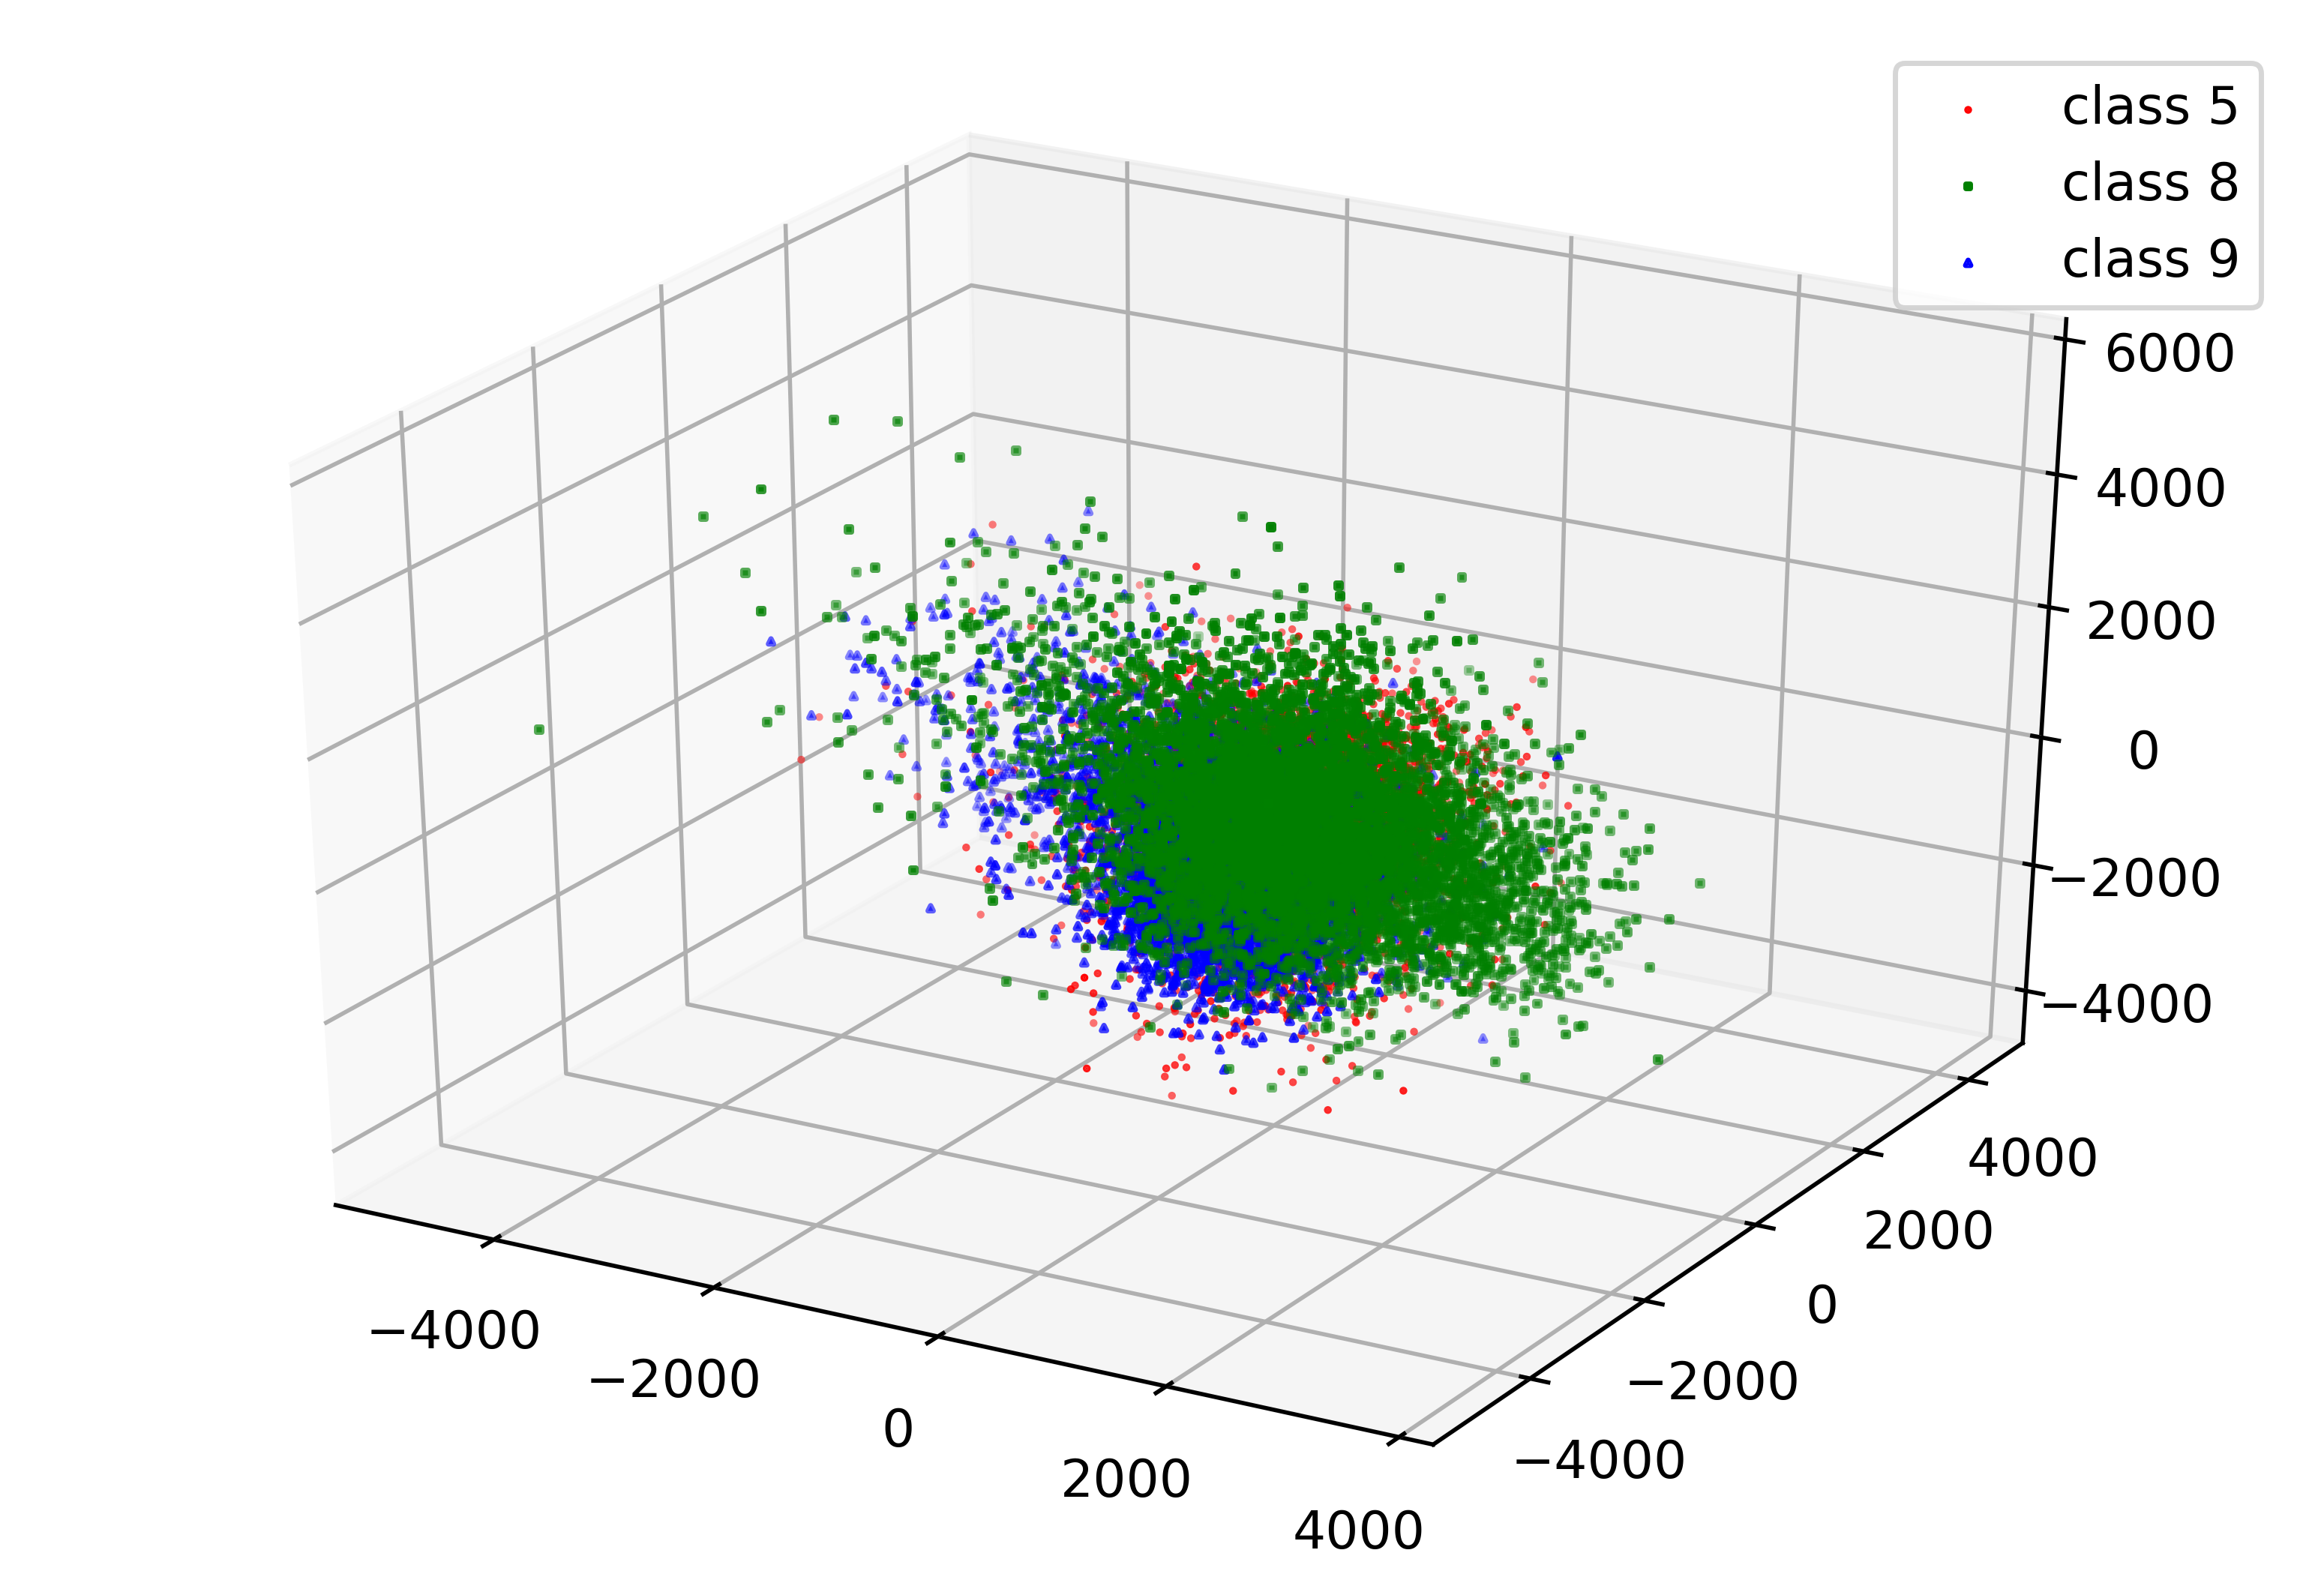

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_RP_5,y_RP_5,z_RP_5,c='r',label='class 5',marker='.',s=1)
ax.scatter(x_RP_8,y_RP_8,z_RP_8,c='g',label='class 8',marker='s',s=1)
ax.scatter(x_RP_9,y_RP_9,z_RP_9,c='b',label='class 9',marker='^',s=1)
ax.legend(loc='best')

# 3. Applying model

## 3.1 GMM

### 3.1.1 GMM with PCA

In [ ]:
from sklearn.mixture import GaussianMixture
my_GMM = GaussianMixture(n_components=3)
my_GMM.fit(xtrain_pca)
GMM_res = my_GMM.predict(xtest_pca)

In [ ]:
GMM_idx_0 = np.where((GMM_res==0))
GMM_idx_1 = np.where((GMM_res==1))
GMM_idx_2 = np.where((GMM_res==2))

In [ ]:
x_xtest_pca = xtest_pca[:,0]
y_xtest_pca = xtest_pca[:,1]
z_xtest_pca = xtest_pca[:,2]

In [ ]:
x_xtest_pca_0 = x_xtest_pca[GMM_idx_0]
x_xtest_pca_1 = x_xtest_pca[GMM_idx_1]
x_xtest_pca_2 = x_xtest_pca[GMM_idx_2]

y_xtest_pca_0 = y_xtest_pca[GMM_idx_0]
y_xtest_pca_1 = y_xtest_pca[GMM_idx_1]
y_xtest_pca_2 = y_xtest_pca[GMM_idx_2]

z_xtest_pca_0 = z_xtest_pca[GMM_idx_0]
z_xtest_pca_1 = z_xtest_pca[GMM_idx_1]
z_xtest_pca_2 = z_xtest_pca[GMM_idx_2]

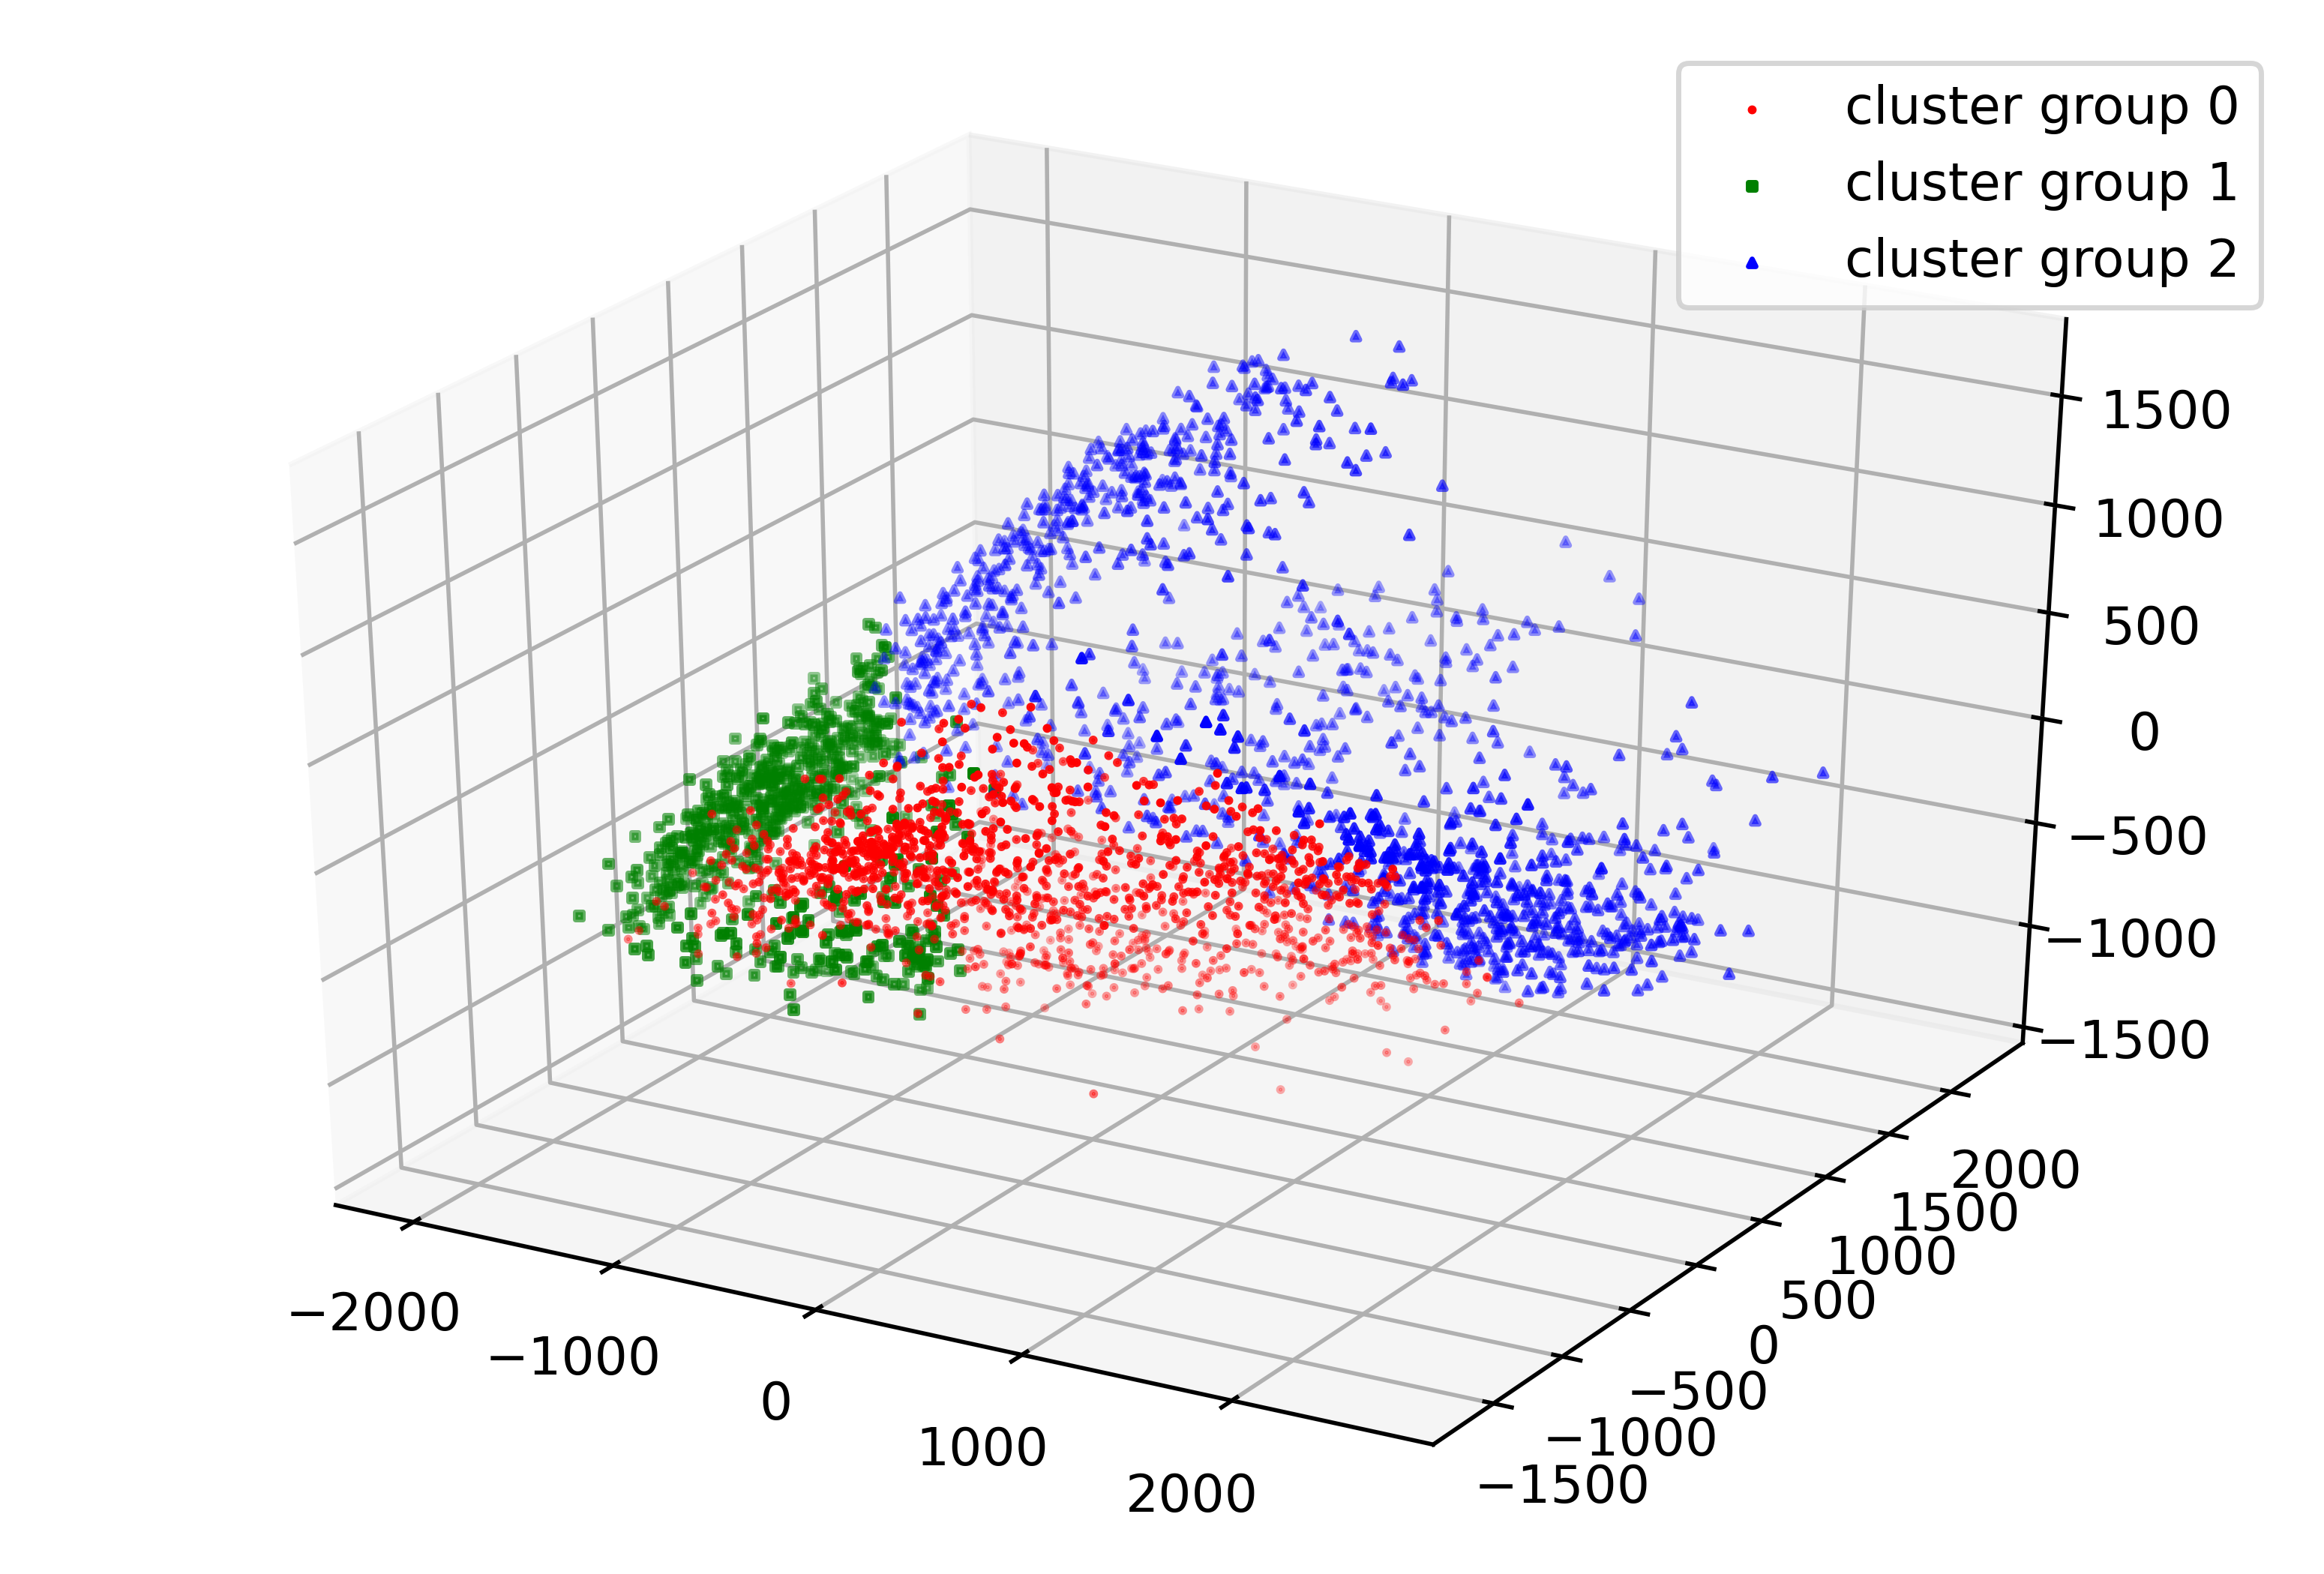

In [ ]:
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_xtest_pca_0,y_xtest_pca_0,z_xtest_pca_0,c='r',label='cluster group 0',marker='.',s=2)
ax.scatter(x_xtest_pca_1,y_xtest_pca_1,z_xtest_pca_1,c='g',label='cluster group 1',marker='s',s=2)
ax.scatter(x_xtest_pca_2,y_xtest_pca_2,z_xtest_pca_2,c='b',label='cluster group 2',marker='^',s=2)
ax.legend(loc='best')


In [ ]:
rand_score(GMM_res,ytest)

0.6767349116372124

In [ ]:
ytest_copy =ytest.copy()

get_accuracy(ytest_copy , ytest,GMM_res)

(0, 1, 2)
Test accuracy : 0.142667
(0, 2, 1)
Test accuracy : 0.281333
(1, 0, 2)
Test accuracy : 0.147333
(1, 2, 0)
Test accuracy : 0.202000
(2, 0, 1)
Test accuracy : 0.308333
(2, 1, 0)
Test accuracy : 0.224333


(0.30833333333333335, (2, 0, 1))

In [ ]:
def get_accuracy(y_test_3_t, y_test_3, y_test_gmm_1):
  comb = permutations([0, 1, 2], 3)
  acc_test_max = 0
  index = 0
  for i in comb:
      print(i)
      y_test_3_t[y_test_3 == 9] = i[0]
      y_test_3_t[y_test_3 == 8] = i[1]
      y_test_3_t[y_test_3 == 5] = i[2]
      acc_test = accuracy_score(y_test_gmm_1, y_test_3_t)
      if(acc_test_max < acc_test):
        acc_test_max = acc_test
        index = i
      print("Test accuracy : %f" % acc_test) # Test accuracy 
  return acc_test_max, index  

### 3.1.2 GMM with random projection

In [ ]:
my_GMM_1 = GaussianMixture(n_components=3)
my_GMM_1.fit(xtrain_RP)
GMM_res_1 = my_GMM.predict(xtest_RP)

In [ ]:
GMM_idx_0_RP = np.where((GMM_res_1==0))
GMM_idx_1_RP = np.where((GMM_res_1==1))
GMM_idx_2_RP = np.where((GMM_res_1==2))

In [ ]:
x_xtest_RP = xtest_RP[:,0]
y_xtest_RP = xtest_RP[:,1]
z_xtest_RP = xtest_RP[:,2]

In [ ]:
x_xtest_RP_0 = x_xtest_RP[GMM_idx_0_RP]
x_xtest_RP_1 = x_xtest_RP[GMM_idx_1_RP]
x_xtest_RP_2 = x_xtest_RP[GMM_idx_2_RP]

y_xtest_RP_0 = y_xtest_RP[GMM_idx_0_RP]
y_xtest_RP_1 = y_xtest_RP[GMM_idx_1_RP]
y_xtest_RP_2 = y_xtest_RP[GMM_idx_2_RP]

z_xtest_RP_0 = z_xtest_RP[GMM_idx_0_RP]
z_xtest_RP_1 = z_xtest_RP[GMM_idx_1_RP]
z_xtest_RP_2 = z_xtest_RP[GMM_idx_2_RP]

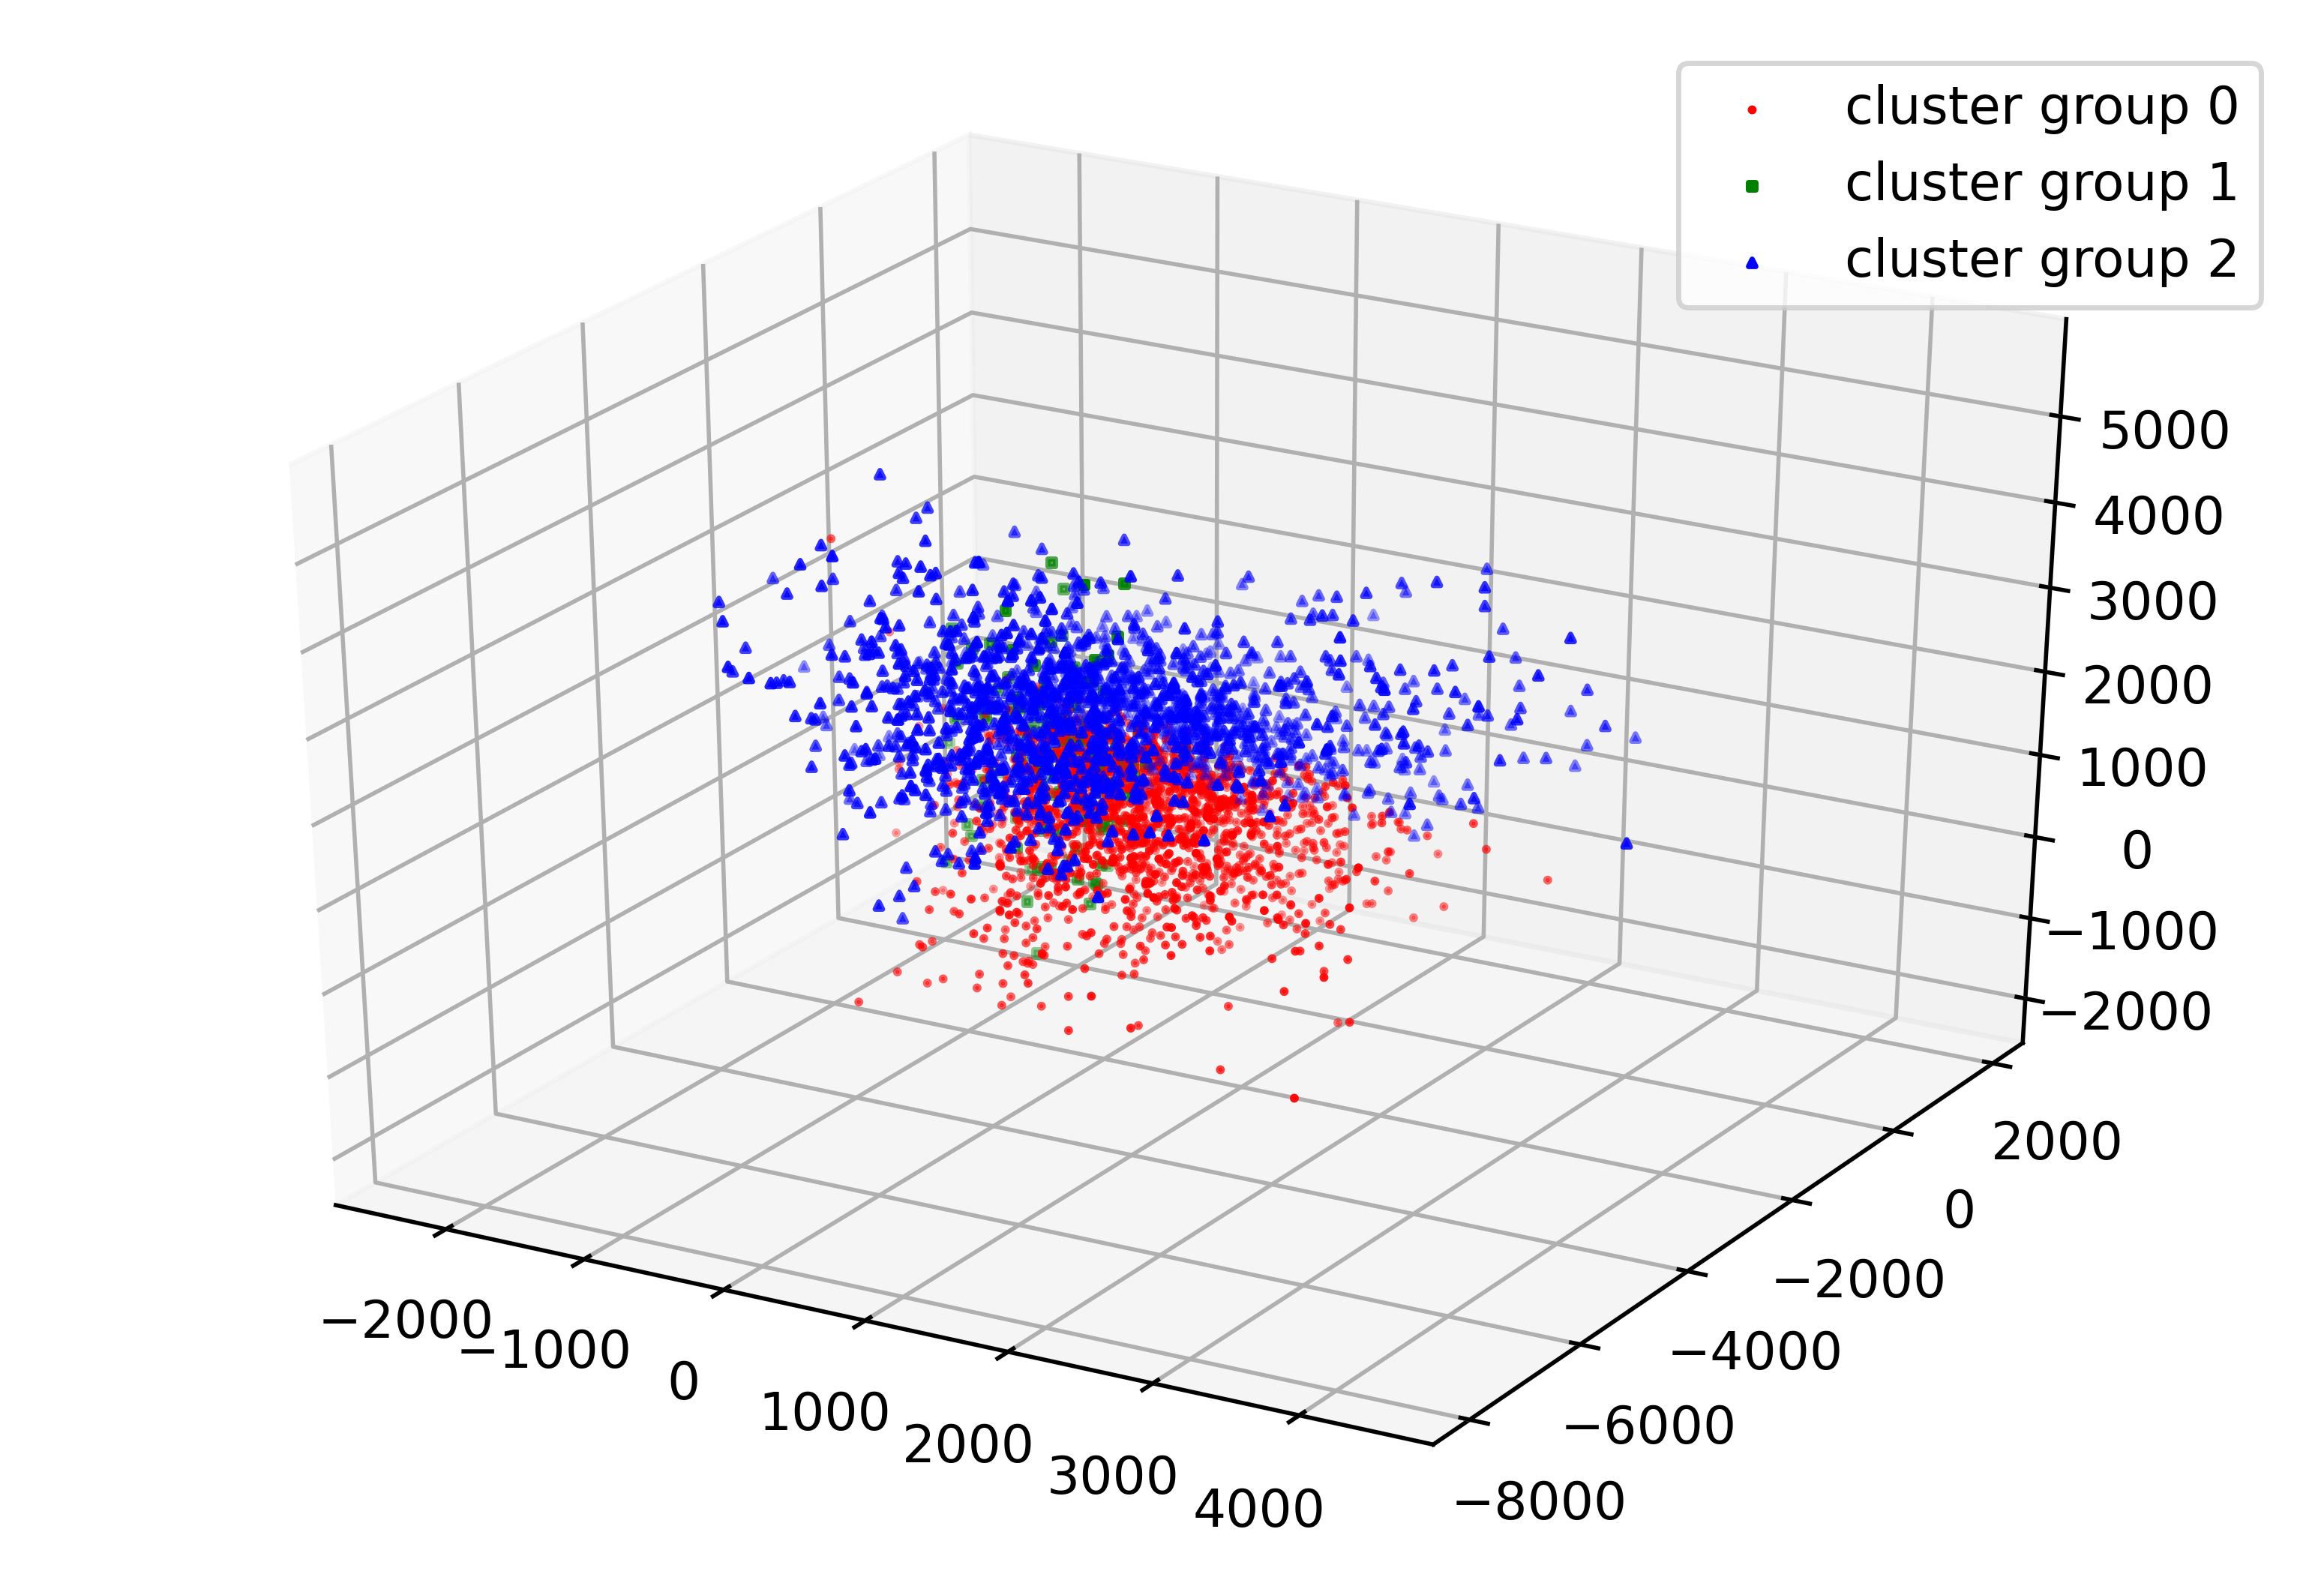

In [ ]:
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_xtest_RP_0,y_xtest_RP_0,z_xtest_RP_0,c='r',label='cluster group 0',marker='.',s=2)
ax.scatter(x_xtest_RP_1,y_xtest_RP_1,z_xtest_RP_1,c='g',label='cluster group 1',marker='s',s=2)
ax.scatter(x_xtest_RP_2,y_xtest_RP_2,z_xtest_RP_2,c='b',label='cluster group 2',marker='^',s=2)
ax.legend(loc='best')


In [ ]:
rand_score(GMM_res_1,ytest)

0.5439711014782705

## 3.2 K-Means

### 3.2.1 K-Means with PCA

In [ ]:
from sklearn.cluster import KMeans
my_Kmeans_0 = KMeans(n_clusters=3)
my_Kmeans_0.fit(xtrain_pca)
Kmeans_res_0 = my_Kmeans_0.predict(xtest_pca)

In [ ]:
KMeans_idx_0_pca = np.where((Kmeans_res_0==0))
KMeans_idx_1_pca = np.where((Kmeans_res_0==1))
KMeans_idx_2_pca = np.where((Kmeans_res_0==2))

In [ ]:
x_xtest_pca_0 = x_xtest_pca[KMeans_idx_0_pca]
x_xtest_pca_1 = x_xtest_pca[KMeans_idx_1_pca]
x_xtest_pca_2 = x_xtest_pca[KMeans_idx_2_pca]

y_xtest_pca_0 = y_xtest_pca[KMeans_idx_0_pca]
y_xtest_pca_1 = y_xtest_pca[KMeans_idx_1_pca]
y_xtest_pca_2 = y_xtest_pca[KMeans_idx_2_pca]

z_xtest_pca_0 = z_xtest_pca[KMeans_idx_0_pca]
z_xtest_pca_1 = z_xtest_pca[KMeans_idx_1_pca]
z_xtest_pca_2 = z_xtest_pca[KMeans_idx_2_pca]

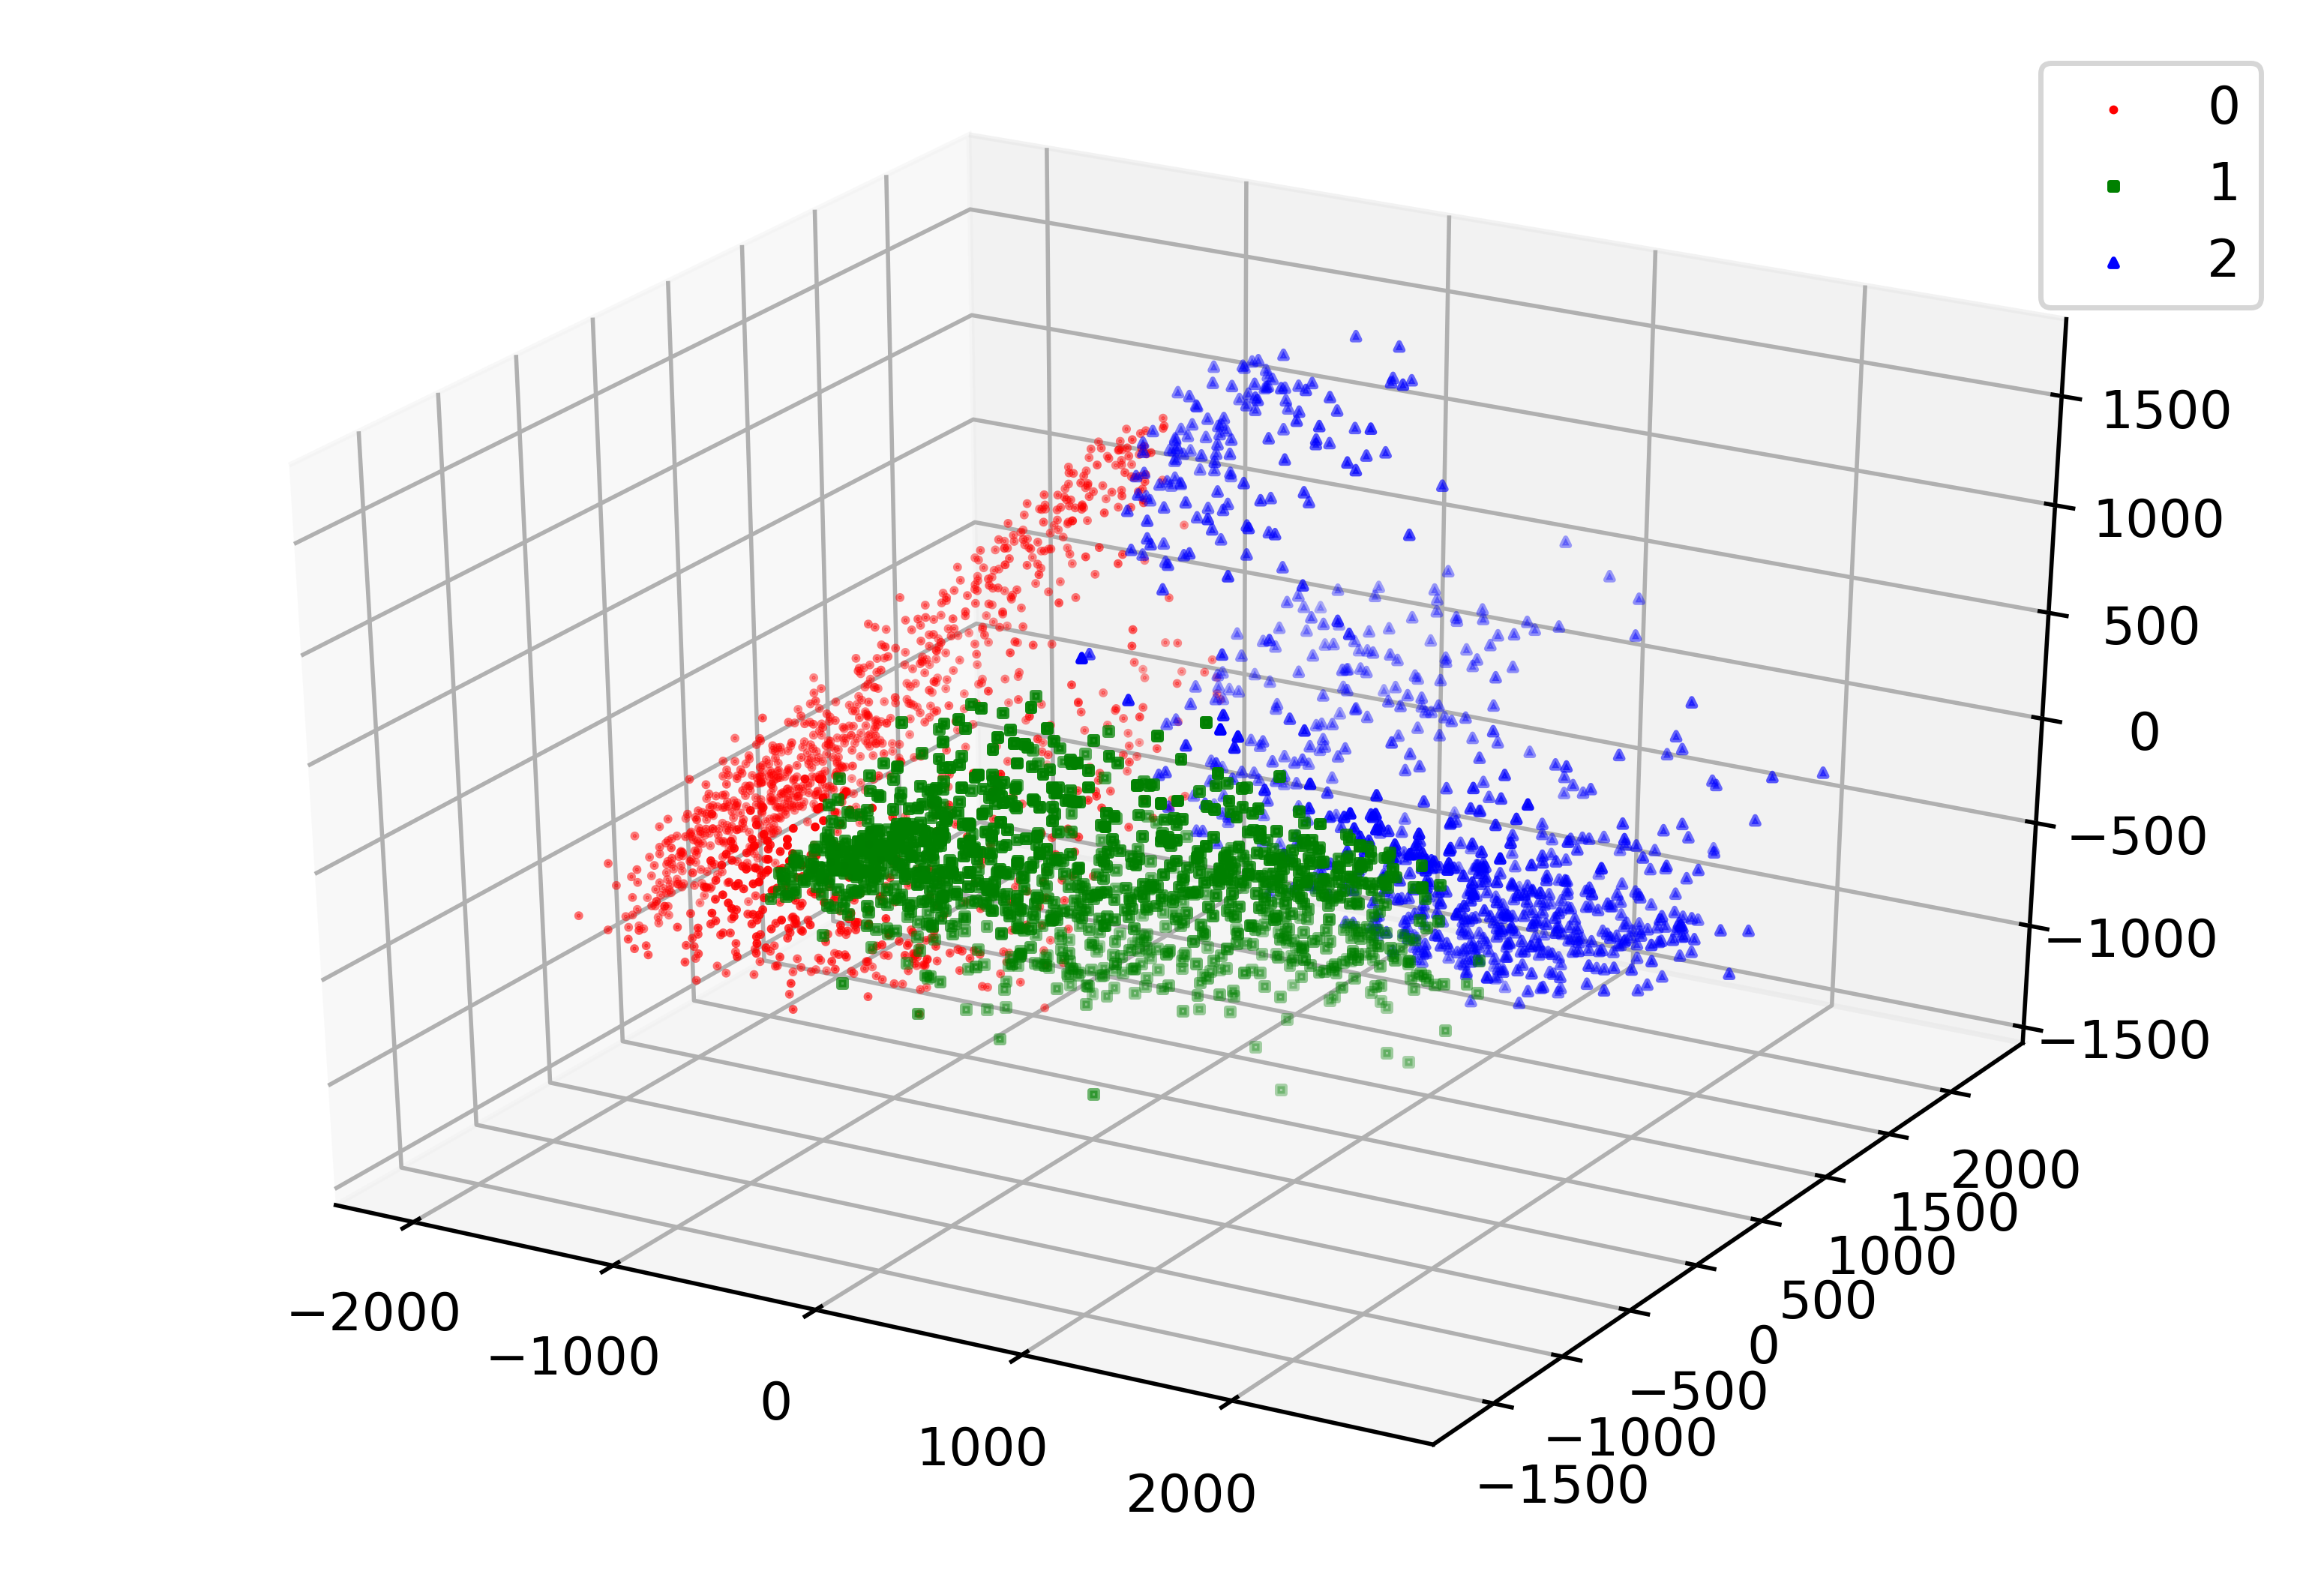

In [ ]:
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_xtest_pca_0,y_xtest_pca_0,z_xtest_pca_0,c='r',label='0',marker='.',s=2)
ax.scatter(x_xtest_pca_1,y_xtest_pca_1,z_xtest_pca_1,c='g',label='1',marker='s',s=2)
ax.scatter(x_xtest_pca_2,y_xtest_pca_2,z_xtest_pca_2,c='b',label='2',marker='^',s=2)
ax.legend(loc='best')


In [ ]:
rand_score(Kmeans_res_0,ytest)

0.6803970212292987

### 3.2.2 K-Means with random projection

In [ ]:
my_Kmeans_1 = KMeans(n_clusters=3)
my_Kmeans_1.fit(xtrain_RP)
Kmeans_res_1 = my_Kmeans_1.predict(xtest_RP)

In [ ]:
KMeans_idx_0_RP = np.where((Kmeans_res_1==0))
KMeans_idx_1_RP = np.where((Kmeans_res_1==1))
KMeans_idx_2_RP = np.where((Kmeans_res_1==2))

In [ ]:
x_xtest_RP_0 = x_xtest_RP[KMeans_idx_0_RP]
x_xtest_RP_1 = x_xtest_RP[KMeans_idx_1_RP]
x_xtest_RP_2 = x_xtest_RP[KMeans_idx_2_RP]

y_xtest_RP_0 = y_xtest_RP[KMeans_idx_0_RP]
y_xtest_RP_1 = y_xtest_RP[KMeans_idx_1_RP]
y_xtest_RP_2 = y_xtest_RP[KMeans_idx_2_RP]

z_xtest_RP_0 = z_xtest_RP[KMeans_idx_0_RP]
z_xtest_RP_1 = z_xtest_RP[KMeans_idx_1_RP]
z_xtest_RP_2 = z_xtest_RP[KMeans_idx_2_RP]

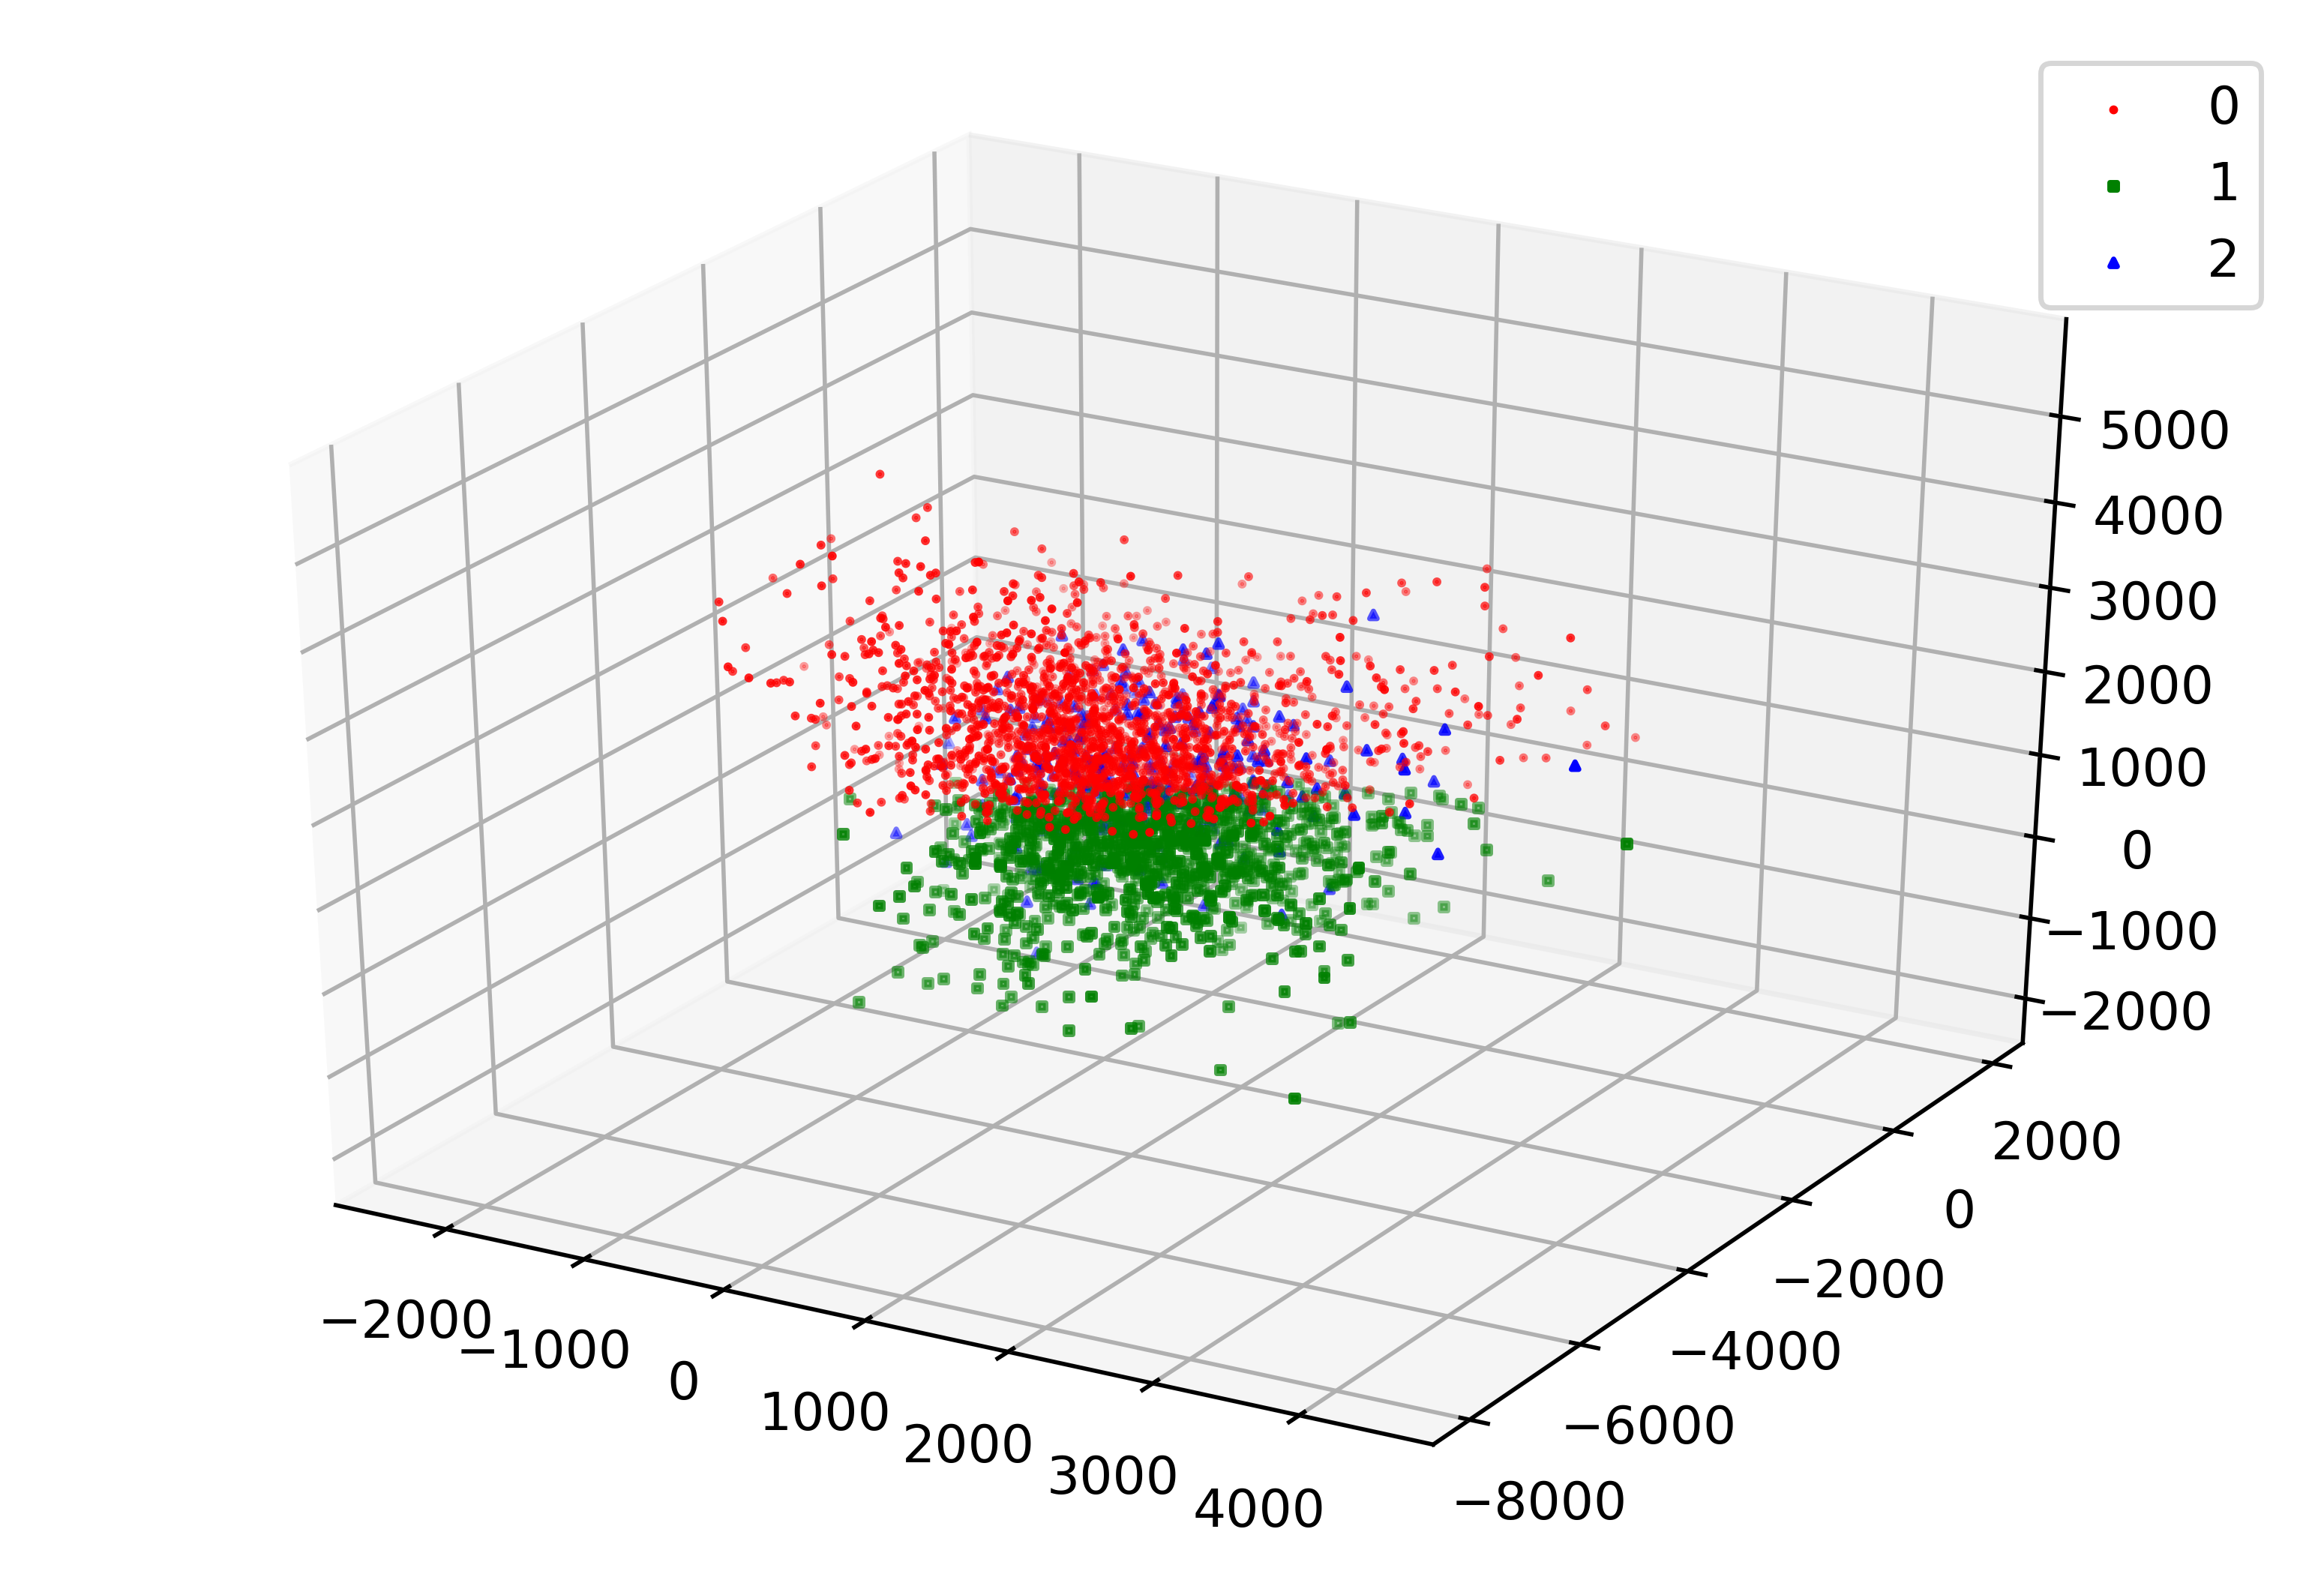

In [ ]:
fig = plt.figure(dpi=500)
ax = Axes3D(fig)
ax.scatter(x_xtest_RP_0,y_xtest_RP_0,z_xtest_RP_0,c='r',label='0',marker='.',s=2)
ax.scatter(x_xtest_RP_1,y_xtest_RP_1,z_xtest_RP_1,c='g',label='1',marker='s',s=2)
ax.scatter(x_xtest_RP_2,y_xtest_RP_2,z_xtest_RP_2,c='b',label='2',marker='^',s=2)
ax.legend(loc='best')


In [ ]:
rand_score(Kmeans_res_1,ytest)

0.5527811492719795